## RandomForest 분류모델을 구현할 수있는API
* Argument(인자)
> * n_estimator: Random Forest 에서 사용할 Decision Tree 모델의 개수
> * n_jobs : 병렬 학습에 적용할 쓰레드의 개수
> * -1 은 해당 시스템에서 사용 가능한 최대의 쓰레드 사용
> * 나머지는 Decision Tree 와 동일

* Method(함수)
> * fit(X, y) : 학습 데이터를 이용하여 모델을 학습
> * predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측 값(y) 반환
> * score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능 반환

* Attribute(속성)
> * classes_ : 학습에 사용된 클래스의 라벨 정보
> * estimators_ : 학습에 참여한 sub Decision Tree 모델 객체

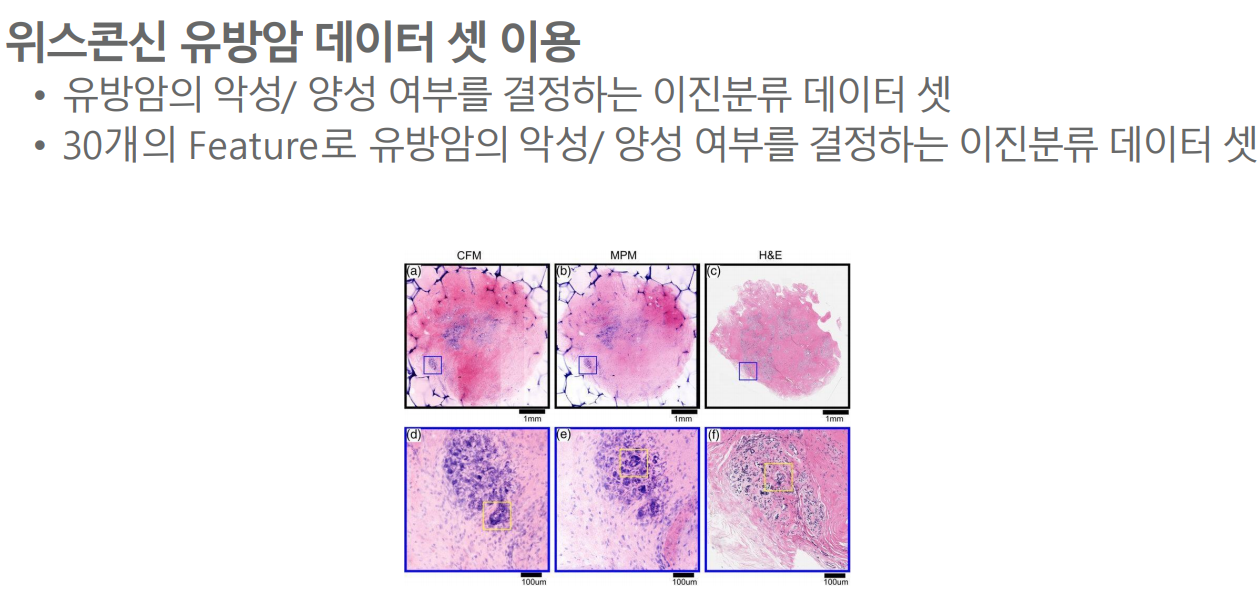

In [1]:
# 위스콘신 유방암 데이터 load 및 분할
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train,x_test, y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 99)

In [2]:
# Random Forest 분류 모델 학습
# Random Forest 분류 모델 객체 생성 및 학습
# 학습된 모델의 예측 값을 이용해 성능 확인
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0) 
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)

In [3]:
# 학습된 모델의 예측 값을 이용해 성능 확인
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test , pred):
  accuracy = accuracy_score(y_test , pred) 
  precision = precision_score(y_test , pred) 
  recall = recall_score(y_test , pred)
  print('Accuracy: {0:.4f}, Presion: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

get_clf_eval(y_test , pred)

Accuracy: 0.9737, Presion: 0.9620, Recall: 1.0000


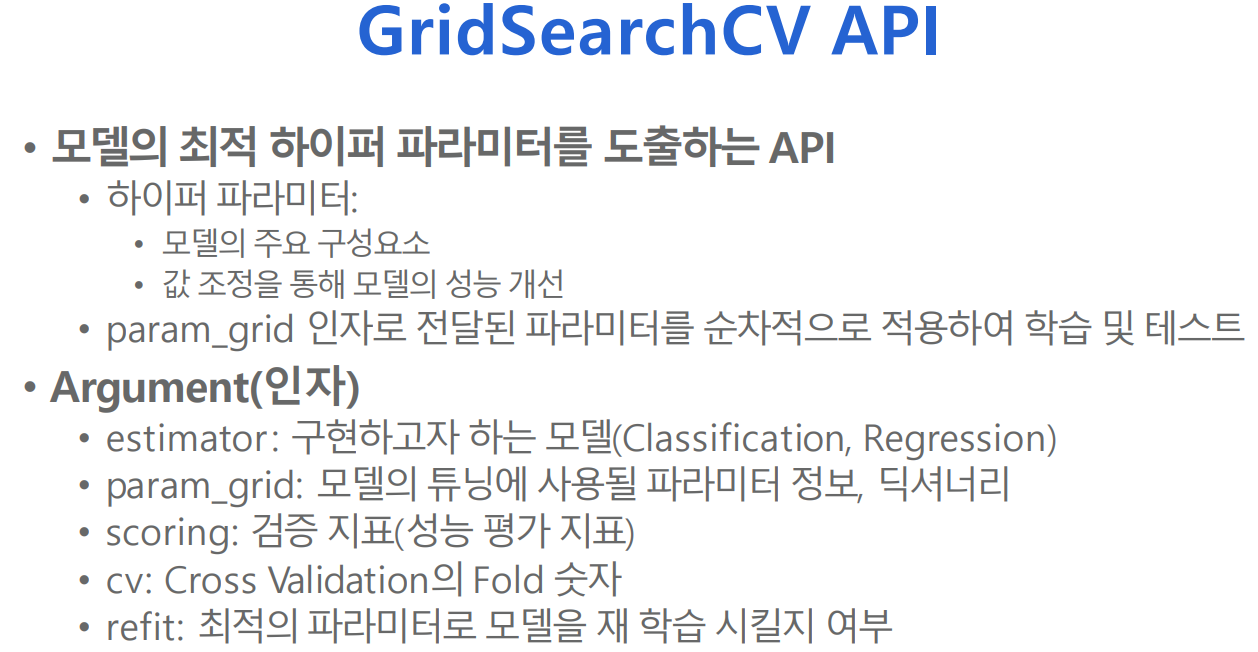

* 랜덤 포레스트에서 사용하는 하이퍼 파라미터

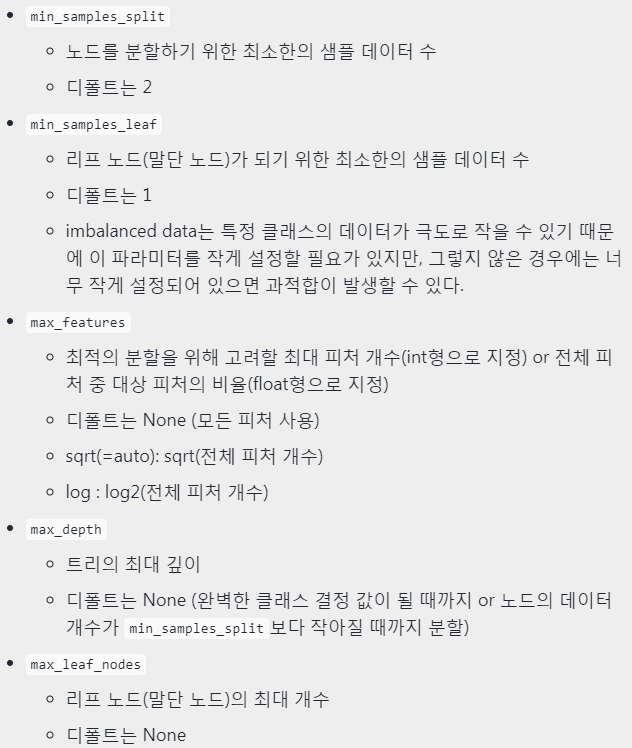

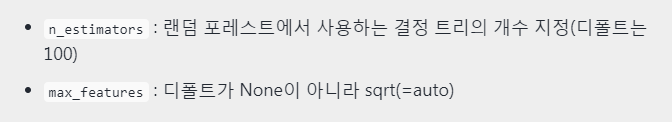

In [4]:
# GridSearchCV API 사용한 하이퍼파라미터 조정
# 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
          'max_depth':[2 ,4 ,6, 8, 10, 12],
          'min_samples_leaf':[2 ,4, 6, 8, 12, 18],
          'min_samples_split':[2 ,4, 6, 8, 16, 20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2)
grid_cv.fit(x_train, y_train)

print('최적의 매개 변수') 
print(grid_cv.best_params_)
print('최상의 교차검증 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('테스트 점수 : {0:.4f}'.format(grid_cv.score(x_test, y_test)))

최적의 매개 변수
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
최상의 교차검증 정확도: 0.9516
테스트 점수 : 0.9474


In [5]:
# GridSearchCV API 사용한 하이퍼파라미터 조정
# GridSearchCV API를 통해 얻은 최적 하이퍼파라미터로 모델 객체 생성
# n_estimator를 300으로 증가시켜 학습 및 성능 평가
rf_clf1 = RandomForestClassifier(n_estimators=100,
                                 max_depth=4, min_samples_leaf=2, 
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(x_train , y_train) 
pred = rf_clf1.predict(x_test)

get_clf_eval(y_test , pred)

# 해당 예제는 "점수"가 가장 높은 모델을 수락하는 것이 항상 최선의 경로가 아닐 수 있다는 좋은 예
# 점수가 더 높은 모델을 더 신뢰하기 때문

Accuracy: 0.9474, Presion: 0.9268, Recall: 1.0000


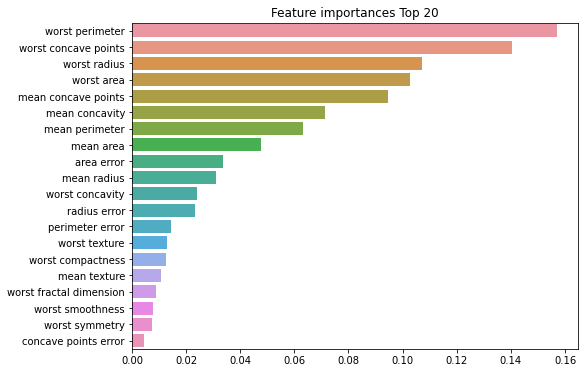

In [6]:
# Feature Importance(특성 중요도)
# Decision Tree를 기본 모델로 사용하여 Feature Importance 확인 가능
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

ftr_importances_values = rf_clf1.feature_importances_ 
ftr_importances = pd.Series(ftr_importances_values, index=cancer.feature_names)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6)) 
plt.title('Feature importances Top 20') 

sns.barplot(x=ftr_top20, y=ftr_top20.index) 
plt.show()